In [1]:
import pandas as pd
data = pd.read_excel('/content/drive/MyDrive/ai_recruitment_dataset/combined_data.xlsx')
print(data.head())

          ID          Name               Role  \
0  brenbr359   brent brown    product manager   
1  jameay305   james ayala  software engineer   
2  scotri565  scott rivera      data engineer   
3  emilke232   emily kelly        ui engineer   
4  ashlra638    ashley ray     data scientist   

                                          Transcript  \
0  product manager interview transcript\n\ninterv...   
1  software engineer interview transcript\n\ninte...   
2  here is a simulated interview for scott rivera...   
3  interview transcript: emily kelly for ui engin...   
4  data scientist interview transcript\n\ncompany...   

                                              Resume  Decision  \
0  here's a sample resume for brent brown applyin...         1   
1  here's a sample resume for james ayala applyin...         1   
2  here's a sample resume for scott rivera applyi...         0   
3  here's a sample resume for emily kelly:\n\nemi...         1   
4  here's a sample resume for ashley r

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the job descriptions and resumes
jd_vectors = vectorizer.fit_transform(data['Job Description'])
resume_vectors = vectorizer.transform(data['Resume'])  # Use transform for consistency
transcript_vectors = vectorizer.transform(data['Transcript'])

In [3]:
jd_vectors

<3379x3235 sparse matrix of type '<class 'numpy.float64'>'
	with 217479 stored elements in Compressed Sparse Row format>

In [4]:
import pickle

# Save the vectorizer model
with open('tfidf_vectorization.pld', 'wb') as file:
    pickle.dump(vectorizer, file)

In [5]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between resume and job description for each candidate
data['resume_job_similarity'] = [cosine_similarity(resume_vectors[i], jd_vectors[i])[0][0] for i in range(len(data))]

# Calculate cosine similarity between transcript and job description for each candidate
data['transcript_jd_similarity'] = [cosine_similarity(transcript_vectors[i], jd_vectors[i])[0][0] for i in range(len(data))]

# Calculate cosine similarity between transcript and resume for each candidate
data['transcript_resume_similarity'] = [cosine_similarity(transcript_vectors[i], resume_vectors[i])[0][0] for i in range(len(data))]

In [6]:
data

,ID,Name,Role,Transcript,Resume,Decision,Reason for decision,Job Description,num_words_in_transcript,resume_job_similarity,transcript_jd_similarity,transcript_resume_similarity
0,brenbr359,brent brown,product manager,product manager interview transcript\n\ninterv...,here's a sample resume for brent brown applyin...,1,experience,we are looking for a skilled product manager w...,620.0,0.306002,0.221197,0.274402
1,jameay305,james ayala,software engineer,software engineer interview transcript\n\ninte...,here's a sample resume for james ayala applyin...,1,experience,we are looking for a skilled software engineer...,687.0,0.271958,0.146769,0.210728
2,scotri565,scott rivera,data engineer,here is a simulated interview for scott rivera...,here's a sample resume for scott rivera applyi...,0,experience,we are looking for a skilled data engineer wit...,511.0,0.347400,0.157992,0.262956
3,emilke232,emily kelly,ui engineer,interview transcript: emily kelly for ui engin...,here's a sample resume for emily kelly:\n\nemi...,1,experience,we are looking for a skilled ui engineer with ...,748.0,0.328376,0.245096,0.302516
4,ashlra638,ashley ray,data scientist,data scientist interview transcript\n\ncompany...,here's a sample resume for ashley ray applying...,0,cultural fit,we are looking for a skilled data scientist wi...,541.0,0.282689,0.130821,0.196054
...,...,...,...,...,...,...,...,...,...,...,...,...
3374,Ravi_196,Ravi Lal,Cybersecurity Analyst,**Interview Transcript**\n\n**Interviewer:** D...,Here is a professional resume for Ravi Lal:\n\...,0,Strong understanding of network security proto...,"As a Cybersecurity Analyst, you will be respon...",NaN,0.508486,0.489393,0.496186
3375,Pooja_197,Pooja Basu,Machine Learning Engineer,Here is a sample interview transcript for a Ma...,Here's a professional resume for Pooja Basu:\n...,0,Knowledge of TensorFlow and PyTorch frameworks...,"Design, develop, and deploy machine learning m...",NaN,0.452585,0.383860,0.381868
3376,Nikhil_198,Nikhil Bhat,UX/UI Designer,"**Interviewer:** Hi Nikhil, thanks for coming ...",Nikhil Bhat\nUX/UI Designer\n\nContact Informa...,0,Proven experience in wireframing and prototypi...,Collaborate with cross-functional teams to des...,NaN,0.461080,0.341621,0.398587
3377,Trisha_199,Trisha Patil,DevOps Engineer,"Interviewer: Good morning, Trisha. Thank you f...",Here's a professional resume for Trisha Patil:...,0,Candidate has expertise in automating software...,"Ensures the reliability, scalability, and effi...",NaN,0.273140,0.305760,0.382944


In [7]:
!pip install vaderSentiment

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()
# Perform sentiment analysis on each transcript
data['sentiment'] = data['Transcript'].apply(lambda transcript: sia.polarity_scores(transcript)['compound'])

In [9]:
from textblob import TextBlob
data['cultural_fit_sentiment'] = data['Reason for decision'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [10]:
data['confidence_score'] = data['Transcript'].apply(lambda x: x.count('I think') + x.count('Maybe'))

In [11]:
def job_fit_analysis(job_desc, transcript):
    # You can use similarity or keyword matching here
    job_keywords = job_desc.split()
    transcript_keywords = transcript.split()
    common_keywords = set(job_keywords).intersection(transcript_keywords)
    return len(common_keywords) / len(job_keywords)

data['job_fit_score'] = data.apply(lambda row: job_fit_analysis(row['Job Description'], row['Transcript']), axis=1)

In [12]:
from textblob import TextBlob
data['soft_skills_sentiment'] = data['Transcript'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [13]:
pip install textstat

In [14]:
import textstat
data['clarity_score'] = data['Transcript'].apply(lambda x: textstat.flesch_reading_ease(x))

In [15]:
bins = [0,0.1, 0.2, 0.4, 0.6, 0.8, 1]
labels = ['0-0.1','0.1-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1']

# Create a new column with binned values
data['similarity_bin'] = pd.cut(data['resume_job_similarity'], bins=bins, labels=labels, include_lowest=True)

In [16]:
role_decision_counts =data.groupby(['similarity_bin', 'Decision','Role']).size().unstack(fill_value=0)
role_decision_counts

<ipython-input-16-e910f14a6e3c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  role_decision_counts =data.groupby(['similarity_bin', 'Decision','Role']).size().unstack(fill_value=0)


Role                     AI Engineer  Business Analyst  Cloud Architect  \
similarity_bin Decision                                                   
0-0.1          0                   0                 0                0   
               1                   0                 0                0   
0.1-0.2        0                   0                 0                0   
               1                   0                 0                0   
0.2-0.4        0                   0                 0                0   
               1                   0                 0                0   
0.4-0.6        0                   4                 4                2   
               1                   0                 0                0   
0.6-0.8        0                   9                 7                6   
               1                   0                 0                0   
0.8-1          0                   0                 0                0   
               1                   0                 0                0   

Role                     Content Writer  Cybersecurity Analyst  \
similarity_bin Decision                                          
0-0.1          0                      0                      0   
               1                      0                      0   
0.1-0.2        0                      0                      0   
               1                      0                      0   
0.2-0.4        0                      0                      1   
               1                      0                      0   
0.4-0.6        0                      0                     28   
               1                      0                      0   
0.6-0.8        0                      5                      2   
               1                      0                      0   
0.8-1          0                      0                      0   
               1                      0                      0   

Role                     Cybersecurity Specialist  Data Analyst  \
similarity_bin Decision                                           
0-0.1          0                                0             0   
               1                                0             0   
0.1-0.2        0                                0            24   
               1                                0             0   
0.2-0.4        0                                0            51   
               1                                0             0   
0.4-0.6        0                                2            26   
               1                                0             0   
0.6-0.8        0                                7             2   
               1                                0             0   
0.8-1          0                                0             0   
               1                                0             0   

Role                     Data Engineer  Data Scientist  \
similarity_bin Decision                                  
0-0.1          0                     0               6   
               1                     0               0   
0.1-0.2        0                    57              68   
               1                     0               0   
0.2-0.4        0                    27             108   
               1                    11              19   
0.4-0.6        0                    86              88   
               1                     3               1   
0.6-0.8        0                     8               2   
               1                     0               0   
0.8-1          0                     0               0   
               1                     0               0   

Role                     Database Administrator  ...  UI Engineer  \
similarity_bin Decision                          ...                
0-0.1          0                              0  ...            0   
               1                              0  ...            0

In [17]:
print(role_decision_counts.columns)

Index(['AI Engineer', 'Business Analyst', 'Cloud Architect', 'Content Writer',
       'Cybersecurity Analyst', 'Cybersecurity Specialist', 'Data Analyst',
       'Data Engineer', 'Data Scientist', 'Database Administrator',
       'DevOps Engineer', 'Digital Marketing Specialist', 'Game Developer',
       'Graphic Designer', 'HR Specialist', 'Machine Learning Engineer',
       'Mobile App Developer', 'Network Engineer', 'Product Manager',
       'Project Manager', 'Software Developer', 'Software Engineer',
       'System Administrator', 'UI Designer', 'UI Engineer', 'UI/UX Designer',
       'UX/UI Designer', 'data analyst', 'data engineer', 'data scientist',
       'product manager', 'software engineer', 'ui designer', 'ui engineer'],
      dtype='object', name='Role')


In [18]:
selected_counts = role_decision_counts.xs(key=1, level='Decision', axis=0)

In [19]:
thresholds = selected_counts.idxmax(axis=1).reset_index()
thresholds.columns = ['Role', 'Threshold_Similarity_Bin']
thresholds

,Role,Threshold_Similarity_Bin
0,0-0.1,data analyst
1,0.1-0.2,product manager
2,0.2-0.4,software engineer
3,0.4-0.6,ui engineer
4,0.6-0.8,AI Engineer
5,0.8-1,AI Engineer


<ipython-input-20-6e2d12175442>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['similarity_bin', 'Decision']).size().unstack(fill_value=0)


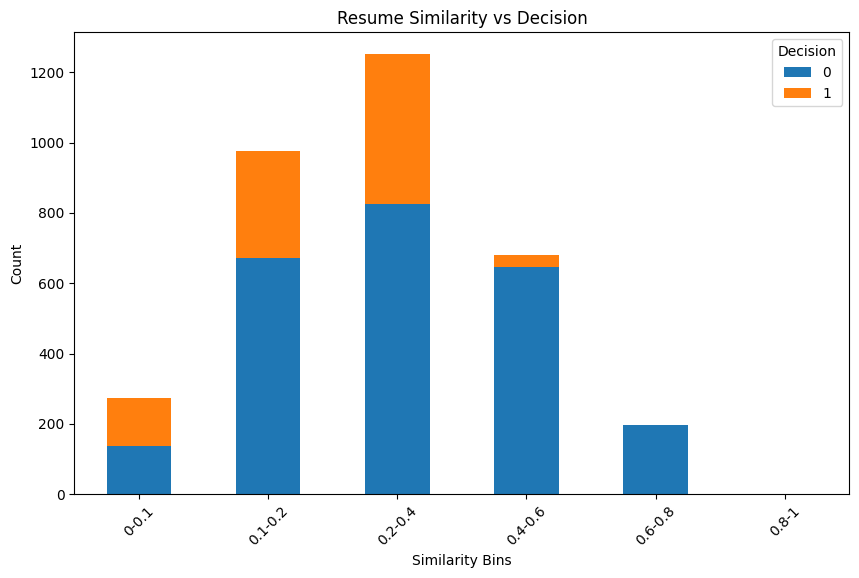

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the similarity distribution grouped by decision
grouped_data = data.groupby(['similarity_bin', 'Decision']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Resume Similarity vs Decision')
plt.ylabel('Count')
plt.xlabel('Similarity Bins')
plt.xticks(rotation=45)
plt.legend(title='Decision')
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Decision'] = le.fit_transform(data['Decision'])
data['acceptance_rate'] = data.groupby(['similarity_bin', 'Role'], observed=True)['Decision'].transform(
    lambda x: x.mean()
)

In [22]:
data

,ID,Name,Role,Transcript,Resume,Decision,Reason for decision,Job Description,num_words_in_transcript,resume_job_similarity,transcript_jd_similarity,transcript_resume_similarity,sentiment,cultural_fit_sentiment,confidence_score,job_fit_score,soft_skills_sentiment,clarity_score,similarity_bin,acceptance_rate
0,brenbr359,brent brown,product manager,product manager interview transcript\n\ninterv...,here's a sample resume for brent brown applyin...,1,experience,we are looking for a skilled product manager w...,620.0,0.306002,0.221197,0.274402,0.9986,0.000000,0,0.647059,0.107568,65.01,0.2-0.4,0.464286
1,jameay305,james ayala,software engineer,software engineer interview transcript\n\ninte...,here's a sample resume for james ayala applyin...,1,experience,we are looking for a skilled software engineer...,687.0,0.271958,0.146769,0.210728,0.9969,0.000000,0,0.666667,0.091728,58.99,0.2-0.4,0.523179
2,scotri565,scott rivera,data engineer,here is a simulated interview for scott rivera...,here's a sample resume for scott rivera applyi...,0,experience,we are looking for a skilled data engineer wit...,511.0,0.347400,0.157992,0.262956,0.9955,0.000000,0,0.437500,0.060836,74.79,0.2-0.4,0.481481
3,emilke232,emily kelly,ui engineer,interview transcript: emily kelly for ui engin...,here's a sample resume for emily kelly:\n\nemi...,1,experience,we are looking for a skilled ui engineer with ...,748.0,0.328376,0.245096,0.302516,0.9954,0.000000,0,0.562500,0.100418,75.91,0.2-0.4,0.533981
4,ashlra638,ashley ray,data scientist,data scientist interview transcript\n\ncompany...,here's a sample resume for ashley ray applying...,0,cultural fit,we are looking for a skilled data scientist wi...,541.0,0.282689,0.130821,0.196054,0.9901,0.250000,0,0.705882,0.042577,69.79,0.2-0.4,0.462069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,Ravi_196,Ravi Lal,Cybersecurity Analyst,**Interview Transcript**\n\n**Interviewer:** D...,Here is a professional resume for Ravi Lal:\n\...,0,Strong understanding of network security proto...,"As a Cybersecurity Analyst, you will be respon...",NaN,0.508486,0.489393,0.496186,0.9988,0.326667,1,0.388350,0.212866,38.52,0.4-0.6,0.000000
3375,Pooja_197,Pooja Basu,Machine Learning Engineer,Here is a sample interview transcript for a Ma...,Here's a professional resume for Pooja Basu:\n...,0,Knowledge of TensorFlow and PyTorch frameworks...,"Design, develop, and deploy machine learning m...",NaN,0.452585,0.383860,0.381868,0.9876,0.041905,2,0.190476,0.203931,44.24,0.4-0.6,0.000000
3376,Nikhil_198,Nikhil Bhat,UX/UI Designer,"**Interviewer:** Hi Nikhil, thanks for coming ...",Nikhil Bhat\nUX/UI Designer\n\nContact Informa...,0,Proven experience in wireframing and prototypi...,Collaborate with cross-functional teams to des...,NaN,0.461080,0.341621,0.398587,0.9992,0.458333,2,0.313433,0.251427,54.52,0.4-0.6,0.000000
3377,Trisha_199,Trisha Patil,DevOps Engineer,"Interviewer: Good morning, Trisha. Thank you f...",Here's a professional resume for Trisha Patil:...,0,Candidate has expertise in automating software...,"Ensures the reliability, scalability, and effi...",NaN,0.273140,0.305760,0.382944,0.9979,0.433333,0,0.297297,0.195793,46.88,0.2-0.4,0.000000


In [23]:
data.groupby(['similarity_bin', 'Role']).size()

<ipython-input-23-1d950cbe874a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['similarity_bin', 'Role']).size()


similarity_bin  Role                 
0-0.1           AI Engineer              0
                Business Analyst         0
                Cloud Architect          0
                Content Writer           0
                Cybersecurity Analyst    0
                                        ..
0.8-1           data scientist           0
                product manager          0
                software engineer        0
                ui designer              0
                ui engineer              0
Length: 204, dtype: int64

In [24]:
data['resume_screening_score'] = (
    0.5 * data['resume_job_similarity'] +
    0.3 * data['cultural_fit_sentiment'] +
    0.2 * data['clarity_score']
)

In [25]:
data['interview_performance_score'] = (
    0.3 * data['sentiment'] +
    0.3 * data['cultural_fit_sentiment'] +
    0.2 * data['soft_skills_sentiment'] +
    0.2 * data['clarity_score']
)

In [26]:
sorted_data = data.sort_values(by='resume_screening_score', ascending=False)
sorted_data

,ID,Name,Role,Transcript,Resume,Decision,Reason for decision,Job Description,num_words_in_transcript,resume_job_similarity,...,sentiment,cultural_fit_sentiment,confidence_score,job_fit_score,soft_skills_sentiment,clarity_score,similarity_bin,acceptance_rate,resume_screening_score,interview_performance_score
2622,U_50,Ava,Software Engineer,"**Interviewer:** Ava, thanks for coming in tod...",**Ava**\n**Software Engineer**\n\n**Contact In...,0,"Insufficient mastery of RESTful APIs, Version ...",Join our team as a Software Engineer and lever...,NaN,0.169208,...,0.9990,0.500000,7,0.304348,0.173022,87.52,0.1-0.2,0.019231,17.738604,17.988304
1756,uppaup83,Bob Miller,UI Engineer,Here's a simulated interview for a UI Engineer...,Here's a sample resume for Bob Miller:\n\n**Bo...,0,Poor cultural fit.,Here is a job description for a UI Engineer ro...,NaN,0.539717,...,0.9979,0.033333,3,0.079096,0.161227,86.91,0.4-0.6,0.010204,17.661859,17.723615
2156,uppaup483,Charlie Brown,Data Scientist,Here's a simulated interview for a Data Scient...,"Here's a resume for Charlie Brown, the lovable...",0,Lack of enthusiasm or motivation.,**Job Title: Data Scientist**\n\n**Job Summary...,NaN,0.533972,...,0.9943,0.000000,7,0.061983,0.250303,84.27,0.4-0.6,0.011236,17.120986,17.202351
1692,uppaup19,Alice Brown,Data Scientist,Here's a simulated interview for a Data Scient...,Here is a sample resume for Alice Brown:\n\n**...,0,Unsatisfactory references or background check.,Here is a job description for a Data Scientist...,NaN,0.542370,...,0.9950,0.000000,6,0.067061,0.281429,79.87,0.4-0.6,0.011236,16.245185,16.328786
2170,uppaup497,Grace Taylor,UI Engineer,"**Interviewer:** Hi Grace, thank you for comin...",Here's a sample resume for Grace Taylor:\n\n**...,0,Lack of relevant skills or experience.,Here is a sample job description for a UI Engi...,NaN,0.532891,...,0.9989,0.400000,5,0.077193,0.195775,79.26,0.4-0.6,0.010204,16.238446,16.310825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,rivash0401,pratiti raj,data analyst,"**interviewer:** dr. rachel lee, manager, busi...",**pratiti raj: data analyst extraordinaire**\n...,1,"expected_experience : 6-8 years, domains: mark...","communicated ideas clearly and effectively., e...",717.0,0.063276,...,0.9994,0.000000,0,0.333333,0.260748,38.01,0-0.1,0.681818,7.633638,7.953970
639,rivash0170,chahal kaur,data scientist,**interview transcript**\n\n**interviewer:** d...,**chahal kaur**\n**data scientist candidate**\...,1,"expected_experience : 3-5 years, domains: heal...",exhibited excellent problem-solving abilities....,737.0,0.059726,...,0.9986,0.000000,0,0.363636,0.164606,37.20,0-0.1,0.740741,7.469863,7.772501
3193,Aarav_15,Aarav Desai,Cybersecurity Analyst,**Interview Transcript: Aarav Desai - Cybersec...,Aarav Desai\nContact Information:\n\n* Address...,0,Experience with Network Security tools and tec...,The Cybersecurity Analyst will conduct vulnera...,NaN,0.500511,...,0.9942,0.216667,0,0.358696,0.139967,34.76,0.4-0.6,0.000000,7.267256,7.343253
3243,Rhea_65,Rhea Ghosh,Cybersecurity Analyst,"Interviewer: Good morning, Rhea. Thank you for...",Here's a professional resume for Rhea Ghosh ap...,0,Network Security expertise is essential for id...,**Cybersecurity Analyst**\n\nThe Cybersecurity...,NaN,0.517926,...,0.9969,0.082143,0,0.245098,0.174633,32.70,0.4-0.6,0.000000,6.823606,6.898639


In [27]:
threshold = 0.75
filtered_data = data[data['resume_screening_score'] >= threshold]
filtered_data

,ID,Name,Role,Transcript,Resume,Decision,Reason for decision,Job Description,num_words_in_transcript,resume_job_similarity,...,sentiment,cultural_fit_sentiment,confidence_score,job_fit_score,soft_skills_sentiment,clarity_score,similarity_bin,acceptance_rate,resume_screening_score,interview_performance_score
0,brenbr359,brent brown,product manager,product manager interview transcript\n\ninterv...,here's a sample resume for brent brown applyin...,1,experience,we are looking for a skilled product manager w...,620.0,0.306002,...,0.9986,0.000000,0,0.647059,0.107568,65.01,0.2-0.4,0.464286,13.155001,13.323094
1,jameay305,james ayala,software engineer,software engineer interview transcript\n\ninte...,here's a sample resume for james ayala applyin...,1,experience,we are looking for a skilled software engineer...,687.0,0.271958,...,0.9969,0.000000,0,0.666667,0.091728,58.99,0.2-0.4,0.523179,11.933979,12.115416
2,scotri565,scott rivera,data engineer,here is a simulated interview for scott rivera...,here's a sample resume for scott rivera applyi...,0,experience,we are looking for a skilled data engineer wit...,511.0,0.347400,...,0.9955,0.000000,0,0.437500,0.060836,74.79,0.2-0.4,0.481481,15.131700,15.268817
3,emilke232,emily kelly,ui engineer,interview transcript: emily kelly for ui engin...,here's a sample resume for emily kelly:\n\nemi...,1,experience,we are looking for a skilled ui engineer with ...,748.0,0.328376,...,0.9954,0.000000,0,0.562500,0.100418,75.91,0.2-0.4,0.533981,15.346188,15.500704
4,ashlra638,ashley ray,data scientist,data scientist interview transcript\n\ncompany...,here's a sample resume for ashley ray applying...,0,cultural fit,we are looking for a skilled data scientist wi...,541.0,0.282689,...,0.9901,0.250000,0,0.705882,0.042577,69.79,0.2-0.4,0.462069,14.174344,14.338545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,Ravi_196,Ravi Lal,Cybersecurity Analyst,**Interview Transcript**\n\n**Interviewer:** D...,Here is a professional resume for Ravi Lal:\n\...,0,Strong understanding of network security proto...,"As a Cybersecurity Analyst, you will be respon...",NaN,0.508486,...,0.9988,0.326667,1,0.388350,0.212866,38.52,0.4-0.6,0.000000,8.056243,8.144213
3375,Pooja_197,Pooja Basu,Machine Learning Engineer,Here is a sample interview transcript for a Ma...,Here's a professional resume for Pooja Basu:\n...,0,Knowledge of TensorFlow and PyTorch frameworks...,"Design, develop, and deploy machine learning m...",NaN,0.452585,...,0.9876,0.041905,2,0.190476,0.203931,44.24,0.4-0.6,0.000000,9.086864,9.197638
3376,Nikhil_198,Nikhil Bhat,UX/UI Designer,"**Interviewer:** Hi Nikhil, thanks for coming ...",Nikhil Bhat\nUX/UI Designer\n\nContact Informa...,0,Proven experience in wireframing and prototypi...,Collaborate with cross-functional teams to des...,NaN,0.461080,...,0.9992,0.458333,2,0.313433,0.251427,54.52,0.4-0.6,0.000000,11.272040,11.391545
3377,Trisha_199,Trisha Patil,DevOps Engineer,"Interviewer: Good morning, Trisha. Thank you f...",Here's a professional resume for Trisha Patil:...,0,Candidate has expertise in automating software...,"Ensures the reliability, scalability, and effi...",NaN,0.273140,...,0.9979,0.433333,0,0.297297,0.195793,46.88,0.2-0.4,0.000000,9.642570,9.844529


In [28]:
data['final_score'] = 0.6 * data['resume_screening_score'] + 0.4 * data['interview_performance_score']
data

,ID,Name,Role,Transcript,Resume,Decision,Reason for decision,Job Description,num_words_in_transcript,resume_job_similarity,...,cultural_fit_sentiment,confidence_score,job_fit_score,soft_skills_sentiment,clarity_score,similarity_bin,acceptance_rate,resume_screening_score,interview_performance_score,final_score
0,brenbr359,brent brown,product manager,product manager interview transcript\n\ninterv...,here's a sample resume for brent brown applyin...,1,experience,we are looking for a skilled product manager w...,620.0,0.306002,...,0.000000,0,0.647059,0.107568,65.01,0.2-0.4,0.464286,13.155001,13.323094,13.222238
1,jameay305,james ayala,software engineer,software engineer interview transcript\n\ninte...,here's a sample resume for james ayala applyin...,1,experience,we are looking for a skilled software engineer...,687.0,0.271958,...,0.000000,0,0.666667,0.091728,58.99,0.2-0.4,0.523179,11.933979,12.115416,12.006554
2,scotri565,scott rivera,data engineer,here is a simulated interview for scott rivera...,here's a sample resume for scott rivera applyi...,0,experience,we are looking for a skilled data engineer wit...,511.0,0.347400,...,0.000000,0,0.437500,0.060836,74.79,0.2-0.4,0.481481,15.131700,15.268817,15.186547
3,emilke232,emily kelly,ui engineer,interview transcript: emily kelly for ui engin...,here's a sample resume for emily kelly:\n\nemi...,1,experience,we are looking for a skilled ui engineer with ...,748.0,0.328376,...,0.000000,0,0.562500,0.100418,75.91,0.2-0.4,0.533981,15.346188,15.500704,15.407994
4,ashlra638,ashley ray,data scientist,data scientist interview transcript\n\ncompany...,here's a sample resume for ashley ray applying...,0,cultural fit,we are looking for a skilled data scientist wi...,541.0,0.282689,...,0.250000,0,0.705882,0.042577,69.79,0.2-0.4,0.462069,14.174344,14.338545,14.240025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,Ravi_196,Ravi Lal,Cybersecurity Analyst,**Interview Transcript**\n\n**Interviewer:** D...,Here is a professional resume for Ravi Lal:\n\...,0,Strong understanding of network security proto...,"As a Cybersecurity Analyst, you will be respon...",NaN,0.508486,...,0.326667,1,0.388350,0.212866,38.52,0.4-0.6,0.000000,8.056243,8.144213,8.091431
3375,Pooja_197,Pooja Basu,Machine Learning Engineer,Here is a sample interview transcript for a Ma...,Here's a professional resume for Pooja Basu:\n...,0,Knowledge of TensorFlow and PyTorch frameworks...,"Design, develop, and deploy machine learning m...",NaN,0.452585,...,0.041905,2,0.190476,0.203931,44.24,0.4-0.6,0.000000,9.086864,9.197638,9.131173
3376,Nikhil_198,Nikhil Bhat,UX/UI Designer,"**Interviewer:** Hi Nikhil, thanks for coming ...",Nikhil Bhat\nUX/UI Designer\n\nContact Informa...,0,Proven experience in wireframing and prototypi...,Collaborate with cross-functional teams to des...,NaN,0.461080,...,0.458333,2,0.313433,0.251427,54.52,0.4-0.6,0.000000,11.272040,11.391545,11.319842
3377,Trisha_199,Trisha Patil,DevOps Engineer,"Interviewer: Good morning, Trisha. Thank you f...",Here's a professional resume for Trisha Patil:...,0,Candidate has expertise in automating software...,"Ensures the reliability, scalability, and effi...",NaN,0.273140,...,0.433333,0,0.297297,0.195793,46.88,0.2-0.4,0.000000,9.642570,9.844529,9.723353
